In [4]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import numpy as np
import time


train_datagen = ImageDataGenerator(rescale=None)
train_generator = train_datagen.flow_from_directory(
        'D:/OCT-Image/make_dataset/train', # train_image_path
        target_size=(299, 299), # image_size
        batch_size=1024, # train_img / batch_size = 1 epoch
        class_mode='categorical')

Found 75484 images belonging to 4 classes.


## z_score 정규화

In [2]:
def z_score_normalization(input_mean, input_std, data):
    result = (data - input_mean) / input_std
    return result

In [4]:
len(train_generator)

74

In [6]:
import numpy as np

input_mean = 128
input_std = 128

for i in range(40,len(train_generator)):
    print(i)
    batch_X = z_score_normalization(input_mean, input_std, train_generator[i][0])
    batch_Y = train_generator[i][1]
    
    np.save("D:/data/train_X{}.npy".format(i), batch_X)
    np.save("D:/data/train_Y{}.npy".format(i), batch_Y)

40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73


In [ ]:
for i in range(14):
    print(i)
    train_X = np.load('C:/AI/OCT/실험2/data/train_X{}.npy'.format(i))
    train_Y = np.load('C:/AI/OCT/실험2/data/train_Y{}.npy'.format(i))
    print(train_X.shape)
    print(train_Y.shape)

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import time


# train_datagen = ImageDataGenerator(rescale=None)
# train_generator = train_datagen.flow_from_directory(
#         'D:/OCT-Image/make_dataset/train', # train_image_path
#         target_size=(299, 299), # image_size
#         batch_size=64, # train_img / batch_size = 1 epoch
#         class_mode='categorical')

# val_datagen = ImageDataGenerator(rescale=None)
# val_generator = val_datagen.flow_from_directory(
#         'D:/OCT-Image/make_dataset/test', # val_image_path
#         target_size=(299, 299), # image_size
#         batch_size=64, # val_img / batch_size = 1 epoch
#         class_mode='categorical')


# model 구성
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=(299,299,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(4, activation='softmax'))
print(model.summary())


# model 학습과정설정
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
              metrics=['acc'])

print("start train")
start = time.time() # 현재시간 측정
for i in range(len(train_generator)):
    print("\n\n")
    train_X = np.load('D:/data/train_X{}.npy'.format(i))
    train_Y = np.load('D:/data/train_Y{}.npy'.format(i))
    
    history = model.fit(x=train_X, y=train_Y, batch_size=64, epochs=100)
print("time :", (time.time() - start) / 60) # 학습하는데 걸리는 시간(현재시간 - 아까 측정한 시간)

model.save('D:/data/Model_2.h5') # 모델 저장시키기

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 299, 299, 32)      896       
_________________________________________________________________
batch_normalization_7 (Batch (None, 299, 299, 32)      128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 149, 149, 64)      18496     
_________________________________________________________________
batch_normalization_8 (Batch (None, 149, 149, 64)      256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 64)       

1024/1024 [==============================] - 4s 4ms/step - loss: 0.0037 - acc: 0.9990
Epoch 43/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0090 - acc: 0.9990
Epoch 44/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0039 - acc: 0.9990
Epoch 45/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0092 - acc: 0.9980
Epoch 46/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0020 - acc: 0.9990
Epoch 47/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0076 - acc: 0.9990
Epoch 48/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0029 - acc: 0.9990
Epoch 49/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0037 - acc: 0.9990
Epoch 50/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0055 - acc: 0.9990
Epoch 51/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0041 - acc: 0.9990
Epoch 52/100
1024/1024 

1024/1024 [==============================] - 4s 4ms/step - loss: 0.1528 - acc: 0.9639
Epoch 5/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0817 - acc: 0.9805
Epoch 6/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0424 - acc: 0.9941
Epoch 7/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0249 - acc: 0.9961
Epoch 8/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0215 - acc: 0.9980
Epoch 9/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0128 - acc: 0.9990
Epoch 10/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0082 - acc: 1.0000
Epoch 11/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0073 - acc: 1.0000
Epoch 12/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0062 - acc: 1.0000
Epoch 13/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0042 - acc: 1.0000
Epoch 14/100
1024/1024 [====

1024/1024 [==============================] - 4s 4ms/step - loss: 2.8683e-04 - acc: 1.0000
Epoch 86/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.6208e-04 - acc: 1.0000
Epoch 87/100
1024/1024 [==============================] - 4s 4ms/step - loss: 4.2200e-04 - acc: 1.0000
Epoch 88/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.7264e-04 - acc: 1.0000
Epoch 89/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.0797e-04 - acc: 1.0000
Epoch 90/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.6924e-04 - acc: 1.0000
Epoch 91/100
1024/1024 [==============================] - 4s 4ms/step - loss: 4.7561e-04 - acc: 1.0000
Epoch 92/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.3327e-04 - acc: 1.0000
Epoch 93/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.5539e-04 - acc: 1.0000
Epoch 94/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.4590e-

Epoch 46/100
1024/1024 [==============================] - 4s 4ms/step - loss: 9.4142e-04 - acc: 1.0000
Epoch 47/100
1024/1024 [==============================] - 4s 4ms/step - loss: 7.0773e-04 - acc: 1.0000
Epoch 48/100
1024/1024 [==============================] - 4s 4ms/step - loss: 4.6667e-04 - acc: 1.0000
Epoch 49/100
1024/1024 [==============================] - 4s 4ms/step - loss: 5.4076e-04 - acc: 1.0000
Epoch 50/100
1024/1024 [==============================] - 4s 4ms/step - loss: 4.5085e-04 - acc: 1.0000
Epoch 51/100
1024/1024 [==============================] - 4s 4ms/step - loss: 4.4304e-04 - acc: 1.0000
Epoch 52/100
1024/1024 [==============================] - 4s 4ms/step - loss: 4.2434e-04 - acc: 1.0000
Epoch 53/100
1024/1024 [==============================] - 4s 4ms/step - loss: 4.2963e-04 - acc: 1.0000
Epoch 54/100
1024/1024 [==============================] - 4s 4ms/step - loss: 4.2410e-04 - acc: 1.0000
Epoch 55/100
1024/1024 [==============================] - 4s 4ms/step - l

1024/1024 [==============================] - 4s 4ms/step - loss: 0.0078 - acc: 1.0000
Epoch 7/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0070 - acc: 1.0000
Epoch 8/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0072 - acc: 0.9990
Epoch 9/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0042 - acc: 1.0000
Epoch 10/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0037 - acc: 1.0000
Epoch 11/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0027 - acc: 1.0000
Epoch 12/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0029 - acc: 1.0000
Epoch 13/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0027 - acc: 1.0000
Epoch 14/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0021 - acc: 1.0000
Epoch 15/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0025 - acc: 1.0000
Epoch 16/100
1024/1024 [==

1024/1024 [==============================] - 4s 4ms/step - loss: 2.7199e-04 - acc: 1.0000
Epoch 67/100
1024/1024 [==============================] - 4s 4ms/step - loss: 1.8733e-04 - acc: 1.0000
Epoch 68/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.6868e-04 - acc: 1.0000
Epoch 69/100
1024/1024 [==============================] - 4s 4ms/step - loss: 1.8802e-04 - acc: 1.0000
Epoch 70/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.0134e-04 - acc: 1.0000
Epoch 71/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.2752e-04 - acc: 1.0000
Epoch 72/100
1024/1024 [==============================] - 4s 4ms/step - loss: 1.9739e-04 - acc: 1.0000
Epoch 73/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.3377e-04 - acc: 1.0000
Epoch 74/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.2719e-04 - acc: 1.0000
Epoch 75/100
1024/1024 [==============================] - 4s 4ms/step - loss: 1.9386e-

1024/1024 [==============================] - 4s 4ms/step - loss: 0.0013 - acc: 1.0000
Epoch 27/100
1024/1024 [==============================] - 4s 4ms/step - loss: 9.6067e-04 - acc: 1.0000
Epoch 28/100
1024/1024 [==============================] - 4s 4ms/step - loss: 7.3926e-04 - acc: 1.0000
Epoch 29/100
1024/1024 [==============================] - 4s 4ms/step - loss: 6.0108e-04 - acc: 1.0000
Epoch 30/100
1024/1024 [==============================] - 4s 4ms/step - loss: 8.9467e-04 - acc: 1.0000
Epoch 31/100
1024/1024 [==============================] - 4s 4ms/step - loss: 7.9570e-04 - acc: 1.0000
Epoch 32/100
1024/1024 [==============================] - 4s 4ms/step - loss: 6.0296e-04 - acc: 1.0000
Epoch 33/100
1024/1024 [==============================] - 4s 4ms/step - loss: 6.6235e-04 - acc: 1.0000
Epoch 34/100
1024/1024 [==============================] - 4s 4ms/step - loss: 6.6920e-04 - acc: 1.0000
Epoch 35/100
1024/1024 [==============================] - 4s 4ms/step - loss: 4.9395e-04 -

1024/1024 [==============================] - 4s 4ms/step - loss: 1.4572e-04 - acc: 1.0000
Epoch 86/100
1024/1024 [==============================] - 4s 4ms/step - loss: 1.0217e-04 - acc: 1.0000
Epoch 87/100
1024/1024 [==============================] - 4s 4ms/step - loss: 1.1956e-04 - acc: 1.0000
Epoch 88/100
1024/1024 [==============================] - 4s 4ms/step - loss: 1.4215e-04 - acc: 1.0000
Epoch 89/100
1024/1024 [==============================] - 4s 4ms/step - loss: 1.3322e-04 - acc: 1.0000
Epoch 90/100
1024/1024 [==============================] - 4s 4ms/step - loss: 1.4918e-04 - acc: 1.0000
Epoch 91/100
1024/1024 [==============================] - 4s 4ms/step - loss: 1.2568e-04 - acc: 1.0000
Epoch 92/100
1024/1024 [==============================] - 4s 4ms/step - loss: 7.1496e-05 - acc: 1.0000
Epoch 93/100
1024/1024 [==============================] - 4s 4ms/step - loss: 1.6169e-04 - acc: 1.0000
Epoch 94/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.1502e-

1024/1024 [==============================] - 4s 4ms/step - loss: 5.8635e-04 - acc: 1.0000
Epoch 46/100
1024/1024 [==============================] - 4s 4ms/step - loss: 4.8155e-04 - acc: 1.0000
Epoch 47/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.8603e-04 - acc: 1.0000
Epoch 48/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.5895e-04 - acc: 1.0000
Epoch 49/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.4910e-04 - acc: 1.0000
Epoch 50/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.5262e-04 - acc: 1.0000
Epoch 51/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.8446e-04 - acc: 1.0000
Epoch 52/100
1024/1024 [==============================] - 4s 4ms/step - loss: 5.0663e-04 - acc: 1.0000
Epoch 53/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.8784e-04 - acc: 1.0000
Epoch 54/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.3912e-

1024/1024 [==============================] - 4s 4ms/step - loss: 0.0158 - acc: 0.9980
Epoch 6/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0105 - acc: 1.0000
Epoch 7/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0056 - acc: 1.0000
Epoch 8/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0064 - acc: 1.0000
Epoch 9/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0048 - acc: 1.0000
Epoch 10/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0034 - acc: 1.0000
Epoch 11/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0045 - acc: 0.9990
Epoch 12/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0028 - acc: 1.0000
Epoch 13/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0028 - acc: 1.0000
Epoch 14/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0022 - acc: 1.0000
Epoch 15/100
1024/1024 [===

1024/1024 [==============================] - 4s 4ms/step - loss: 2.5498e-04 - acc: 1.0000
Epoch 66/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.7856e-04 - acc: 1.0000
Epoch 67/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.1511e-04 - acc: 1.0000
Epoch 68/100
1024/1024 [==============================] - 4s 4ms/step - loss: 5.7826e-04 - acc: 1.0000
Epoch 69/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.5252e-04 - acc: 1.0000
Epoch 70/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.5566e-04 - acc: 1.0000
Epoch 71/100
1024/1024 [==============================] - 4s 4ms/step - loss: 1.2822e-04 - acc: 1.0000
Epoch 72/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.8581e-04 - acc: 1.0000
Epoch 73/100
1024/1024 [==============================] - 4s 4ms/step - loss: 1.7645e-04 - acc: 1.0000
Epoch 74/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.6066e-

1024/1024 [==============================] - 4s 4ms/step - loss: 6.4964e-04 - acc: 1.0000
Epoch 26/100
1024/1024 [==============================] - 4s 4ms/step - loss: 8.9560e-04 - acc: 1.0000
Epoch 27/100
1024/1024 [==============================] - 4s 4ms/step - loss: 5.5440e-04 - acc: 1.0000
Epoch 28/100
1024/1024 [==============================] - 4s 4ms/step - loss: 8.3002e-04 - acc: 1.0000
Epoch 29/100
1024/1024 [==============================] - 4s 4ms/step - loss: 6.4721e-04 - acc: 1.0000
Epoch 30/100
1024/1024 [==============================] - 4s 4ms/step - loss: 6.6581e-04 - acc: 1.0000
Epoch 31/100
1024/1024 [==============================] - 4s 4ms/step - loss: 7.3389e-04 - acc: 1.0000
Epoch 32/100
1024/1024 [==============================] - 4s 4ms/step - loss: 6.0623e-04 - acc: 1.0000
Epoch 33/100
1024/1024 [==============================] - 4s 4ms/step - loss: 6.6033e-04 - acc: 1.0000
Epoch 34/100
1024/1024 [==============================] - 4s 4ms/step - loss: 6.7031e-

1024/1024 [==============================] - 4s 4ms/step - loss: 0.0053 - acc: 0.9980
Epoch 87/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0024 - acc: 0.9990
Epoch 88/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0039 - acc: 0.9980
Epoch 89/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0069 - acc: 0.9980
Epoch 90/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0052 - acc: 0.9980
Epoch 91/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0034 - acc: 0.9990
Epoch 92/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0033 - acc: 0.9990
Epoch 93/100
1024/1024 [==============================] - 4s 4ms/step - loss: 5.5197e-04 - acc: 1.0000
Epoch 94/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0047 - acc: 0.9990
Epoch 95/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0056 - acc: 0.9990
Epoch 96/100
1024/1

1024/1024 [==============================] - 4s 4ms/step - loss: 4.7311e-04 - acc: 1.0000
Epoch 48/100
1024/1024 [==============================] - 4s 4ms/step - loss: 7.0167e-04 - acc: 1.0000
Epoch 49/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.8199e-04 - acc: 1.0000
Epoch 50/100
1024/1024 [==============================] - 4s 4ms/step - loss: 5.3127e-04 - acc: 1.0000
Epoch 51/100
1024/1024 [==============================] - 4s 4ms/step - loss: 5.1967e-04 - acc: 1.0000
Epoch 52/100
1024/1024 [==============================] - 4s 4ms/step - loss: 4.6294e-04 - acc: 1.0000
Epoch 53/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.7209e-04 - acc: 1.0000
Epoch 54/100
1024/1024 [==============================] - 4s 4ms/step - loss: 5.1111e-04 - acc: 1.0000
Epoch 55/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.4500e-04 - acc: 1.0000
Epoch 56/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.8194e-

1024/1024 [==============================] - 4s 4ms/step - loss: 0.0106 - acc: 0.9980
Epoch 8/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0081 - acc: 0.9980
Epoch 9/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0074 - acc: 0.9971
Epoch 10/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0042 - acc: 0.9990
Epoch 11/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0047 - acc: 1.0000
Epoch 12/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0033 - acc: 1.0000
Epoch 13/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0021 - acc: 1.0000
Epoch 14/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0020 - acc: 1.0000
Epoch 15/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0025 - acc: 1.0000
Epoch 16/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0015 - acc: 1.0000
Epoch 17/100
1024/1024 [=

1024/1024 [==============================] - 4s 4ms/step - loss: 2.9437e-04 - acc: 1.0000
Epoch 69/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.4350e-04 - acc: 1.0000
Epoch 70/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.4345e-04 - acc: 1.0000
Epoch 71/100
1024/1024 [==============================] - 4s 4ms/step - loss: 1.6265e-04 - acc: 1.0000
Epoch 72/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.6708e-04 - acc: 1.0000
Epoch 73/100
1024/1024 [==============================] - 4s 4ms/step - loss: 4.5482e-04 - acc: 1.0000
Epoch 74/100
1024/1024 [==============================] - 4s 4ms/step - loss: 1.8888e-04 - acc: 1.0000
Epoch 75/100
1024/1024 [==============================] - 4s 4ms/step - loss: 1.9079e-04 - acc: 1.0000
Epoch 76/100
1024/1024 [==============================] - 4s 4ms/step - loss: 1.5119e-04 - acc: 1.0000
Epoch 77/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.8119e-

1024/1024 [==============================] - 4s 4ms/step - loss: 0.0020 - acc: 0.9990
Epoch 29/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0010 - acc: 1.0000
Epoch 30/100
1024/1024 [==============================] - 4s 4ms/step - loss: 8.6756e-04 - acc: 1.0000
Epoch 31/100
1024/1024 [==============================] - 4s 4ms/step - loss: 6.6560e-04 - acc: 1.0000
Epoch 32/100
1024/1024 [==============================] - 4s 4ms/step - loss: 7.3013e-04 - acc: 1.0000
Epoch 33/100
1024/1024 [==============================] - 4s 4ms/step - loss: 6.4115e-04 - acc: 1.0000
Epoch 34/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0011 - acc: 1.0000
Epoch 35/100
1024/1024 [==============================] - 4s 4ms/step - loss: 5.7200e-04 - acc: 1.0000
Epoch 36/100
1024/1024 [==============================] - 4s 4ms/step - loss: 6.0383e-04 - acc: 1.0000
Epoch 37/100
1024/1024 [==============================] - 4s 4ms/step - loss: 5.0753e-04 - acc: 1.

1024/1024 [==============================] - 4s 4ms/step - loss: 0.0066 - acc: 0.9990
Epoch 9/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0055 - acc: 1.0000
Epoch 10/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0039 - acc: 1.0000
Epoch 11/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0049 - acc: 0.9990
Epoch 12/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0027 - acc: 1.0000
Epoch 13/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0037 - acc: 1.0000
Epoch 14/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0027 - acc: 1.0000
Epoch 15/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0024 - acc: 1.0000
Epoch 16/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0026 - acc: 1.0000
Epoch 17/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0023 - acc: 1.0000
Epoch 18/100
1024/1024 [

1024/1024 [==============================] - 4s 4ms/step - loss: 3.4464e-04 - acc: 1.0000
Epoch 70/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.2807e-04 - acc: 1.0000
Epoch 71/100
1024/1024 [==============================] - 4s 4ms/step - loss: 4.8764e-04 - acc: 1.0000
Epoch 72/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.5300e-04 - acc: 1.0000
Epoch 73/100
1024/1024 [==============================] - 4s 4ms/step - loss: 8.3282e-04 - acc: 1.0000
Epoch 74/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.3196e-04 - acc: 1.0000
Epoch 75/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.3776e-04 - acc: 1.0000
Epoch 76/100
1024/1024 [==============================] - 4s 4ms/step - loss: 6.3811e-04 - acc: 1.0000
Epoch 77/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.8552e-04 - acc: 1.0000
Epoch 78/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.3239e-

1024/1024 [==============================] - 4s 4ms/step - loss: 4.1317e-04 - acc: 1.0000
Epoch 51/100
1024/1024 [==============================] - 4s 4ms/step - loss: 7.2582e-04 - acc: 1.0000
Epoch 52/100
1024/1024 [==============================] - 4s 4ms/step - loss: 5.1386e-04 - acc: 1.0000
Epoch 53/100
1024/1024 [==============================] - 4s 4ms/step - loss: 4.0465e-04 - acc: 1.0000
Epoch 54/100
1024/1024 [==============================] - 4s 4ms/step - loss: 5.0548e-04 - acc: 1.0000
Epoch 55/100
1024/1024 [==============================] - 4s 4ms/step - loss: 4.1361e-04 - acc: 1.0000
Epoch 56/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.7143e-04 - acc: 1.0000
Epoch 57/100
1024/1024 [==============================] - 4s 4ms/step - loss: 4.7241e-04 - acc: 1.0000
Epoch 58/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.3852e-04 - acc: 1.0000
Epoch 59/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.7359e-

1024/1024 [==============================] - 4s 4ms/step - loss: 0.0061 - acc: 0.9980
Epoch 11/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0035 - acc: 1.0000
Epoch 12/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0074 - acc: 0.9990
Epoch 13/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0038 - acc: 0.9990
Epoch 14/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0017 - acc: 1.0000
Epoch 15/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0018 - acc: 1.0000
Epoch 16/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0023 - acc: 1.0000
Epoch 17/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0019 - acc: 1.0000
Epoch 18/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0025 - acc: 1.0000
Epoch 19/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0014 - acc: 1.0000
Epoch 20/100
1024/1024 

1024/1024 [==============================] - 4s 4ms/step - loss: 3.4090e-04 - acc: 1.0000
Epoch 72/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.2748e-04 - acc: 1.0000
Epoch 73/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.9169e-04 - acc: 1.0000
Epoch 74/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.4587e-04 - acc: 1.0000
Epoch 75/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.5104e-04 - acc: 1.0000
Epoch 76/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.5544e-04 - acc: 1.0000
Epoch 77/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.7137e-04 - acc: 1.0000
Epoch 78/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.3049e-04 - acc: 1.0000
Epoch 79/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.3229e-04 - acc: 1.0000
Epoch 80/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.1021e-

Epoch 52/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.9692e-04 - acc: 1.0000
Epoch 53/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.3221e-04 - acc: 1.0000
Epoch 54/100
1024/1024 [==============================] - 4s 4ms/step - loss: 5.4988e-04 - acc: 1.0000
Epoch 55/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.8160e-04 - acc: 1.0000
Epoch 56/100
1024/1024 [==============================] - 4s 4ms/step - loss: 8.5974e-04 - acc: 1.0000
Epoch 57/100
1024/1024 [==============================] - 4s 4ms/step - loss: 4.7379e-04 - acc: 1.0000
Epoch 58/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.5128e-04 - acc: 1.0000
Epoch 59/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.9389e-04 - acc: 1.0000
Epoch 60/100
1024/1024 [==============================] - 4s 4ms/step - loss: 4.2394e-04 - acc: 1.0000
Epoch 61/100
1024/1024 [==============================] - 4s 4ms/step - l

1024/1024 [==============================] - 4s 4ms/step - loss: 0.0029 - acc: 1.0000
Epoch 13/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0021 - acc: 1.0000
Epoch 14/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0021 - acc: 1.0000
Epoch 15/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0029 - acc: 0.9990
Epoch 16/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0033 - acc: 0.9980
Epoch 17/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0026 - acc: 1.0000
Epoch 18/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0018 - acc: 1.0000
Epoch 19/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0018 - acc: 1.0000
Epoch 20/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0014 - acc: 1.0000
Epoch 21/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0017 - acc: 1.0000
Epoch 22/100
1024/1024 

1024/1024 [==============================] - 4s 4ms/step - loss: 5.8255e-04 - acc: 1.0000
Epoch 73/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.2892e-04 - acc: 1.0000
Epoch 74/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.8172e-04 - acc: 1.0000
Epoch 75/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.5111e-04 - acc: 1.0000
Epoch 76/100
1024/1024 [==============================] - 4s 4ms/step - loss: 6.4602e-04 - acc: 1.0000
Epoch 77/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.7206e-04 - acc: 1.0000
Epoch 78/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.7644e-04 - acc: 1.0000
Epoch 79/100
1024/1024 [==============================] - 4s 4ms/step - loss: 1.6601e-04 - acc: 1.0000
Epoch 80/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.0055e-04 - acc: 1.0000
Epoch 81/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.3519e-

1024/1024 [==============================] - 4s 4ms/step - loss: 6.6327e-04 - acc: 1.0000
Epoch 33/100
1024/1024 [==============================] - 4s 4ms/step - loss: 8.7468e-04 - acc: 1.0000
Epoch 34/100
1024/1024 [==============================] - 4s 4ms/step - loss: 8.7167e-04 - acc: 1.0000
Epoch 35/100
1024/1024 [==============================] - 4s 4ms/step - loss: 4.2431e-04 - acc: 1.0000
Epoch 36/100
1024/1024 [==============================] - 4s 4ms/step - loss: 9.5963e-04 - acc: 1.0000
Epoch 37/100
1024/1024 [==============================] - 4s 4ms/step - loss: 5.6697e-04 - acc: 1.0000
Epoch 38/100
1024/1024 [==============================] - 4s 4ms/step - loss: 9.0344e-04 - acc: 1.0000
Epoch 39/100
1024/1024 [==============================] - 4s 4ms/step - loss: 8.0688e-04 - acc: 1.0000
Epoch 40/100
1024/1024 [==============================] - 4s 4ms/step - loss: 9.4992e-04 - acc: 1.0000
Epoch 41/100
1024/1024 [==============================] - 4s 4ms/step - loss: 6.8048e-

1024/1024 [==============================] - 4s 4ms/step - loss: 3.3495e-04 - acc: 1.0000
Epoch 93/100
1024/1024 [==============================] - 4s 4ms/step - loss: 1.2846e-04 - acc: 1.0000
Epoch 94/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.4151e-04 - acc: 1.0000
Epoch 95/100
1024/1024 [==============================] - 4s 4ms/step - loss: 1.5818e-04 - acc: 1.0000
Epoch 96/100
1024/1024 [==============================] - 4s 4ms/step - loss: 5.6200e-04 - acc: 1.0000
Epoch 97/100
1024/1024 [==============================] - 4s 4ms/step - loss: 1.7641e-04 - acc: 1.0000
Epoch 98/100
1024/1024 [==============================] - 4s 4ms/step - loss: 5.9585e-04 - acc: 1.0000
Epoch 99/100
1024/1024 [==============================] - 4s 4ms/step - loss: 1.4033e-04 - acc: 1.0000
Epoch 100/100
1024/1024 [==============================] - 4s 4ms/step - loss: 1.5446e-04 - acc: 1.0000



Epoch 1/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.615

1024/1024 [==============================] - 4s 4ms/step - loss: 4.4746e-04 - acc: 1.0000
Epoch 74/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.7997e-04 - acc: 1.0000
Epoch 75/100
1024/1024 [==============================] - 4s 4ms/step - loss: 4.9506e-04 - acc: 1.0000
Epoch 76/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.5104e-04 - acc: 1.0000
Epoch 77/100
1024/1024 [==============================] - 4s 4ms/step - loss: 1.6881e-04 - acc: 1.0000
Epoch 78/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.0808e-04 - acc: 1.0000
Epoch 79/100
1024/1024 [==============================] - 4s 4ms/step - loss: 6.4354e-04 - acc: 1.0000
Epoch 80/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.5670e-04 - acc: 1.0000
Epoch 81/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.5856e-04 - acc: 1.0000
Epoch 82/100
1024/1024 [==============================] - 4s 4ms/step - loss: 5.6263e-

1024/1024 [==============================] - 4s 4ms/step - loss: 5.9617e-04 - acc: 1.0000
Epoch 55/100
1024/1024 [==============================] - 4s 4ms/step - loss: 5.8166e-04 - acc: 1.0000
Epoch 56/100
1024/1024 [==============================] - 4s 4ms/step - loss: 5.0114e-04 - acc: 1.0000
Epoch 57/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.2618e-04 - acc: 1.0000
Epoch 58/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.7315e-04 - acc: 1.0000
Epoch 59/100
1024/1024 [==============================] - 4s 4ms/step - loss: 4.4658e-04 - acc: 1.0000
Epoch 60/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0012 - acc: 1.0000
Epoch 61/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.5617e-04 - acc: 1.0000
Epoch 62/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.4856e-04 - acc: 1.0000
Epoch 63/100
1024/1024 [==============================] - 4s 4ms/step - loss: 4.5100e-04 -

1024/1024 [==============================] - 4s 4ms/step - loss: 0.0026 - acc: 1.0000
Epoch 15/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0012 - acc: 1.0000
Epoch 16/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0021 - acc: 1.0000
Epoch 17/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0012 - acc: 1.0000
Epoch 18/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0014 - acc: 1.0000
Epoch 19/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0013 - acc: 1.0000
Epoch 20/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0011 - acc: 1.0000
Epoch 21/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0019 - acc: 0.9990
Epoch 22/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0019 - acc: 1.0000
Epoch 23/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0013 - acc: 1.0000
Epoch 24/100
1024/1024 

1024/1024 [==============================] - 4s 4ms/step - loss: 3.0378e-04 - acc: 1.0000
Epoch 76/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.9832e-04 - acc: 1.0000
Epoch 77/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.1382e-04 - acc: 1.0000
Epoch 78/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.1985e-04 - acc: 1.0000
Epoch 79/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.5962e-04 - acc: 1.0000
Epoch 80/100
1024/1024 [==============================] - 4s 4ms/step - loss: 1.3982e-04 - acc: 1.0000
Epoch 81/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.5243e-04 - acc: 1.0000
Epoch 82/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.8333e-04 - acc: 1.0000
Epoch 83/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0013 - acc: 0.9990
Epoch 84/100
1024/1024 [==============================] - 4s 4ms/step - loss: 4.0425e-04 -

1024/1024 [==============================] - 4s 4ms/step - loss: 4.0115e-04 - acc: 1.0000
Epoch 57/100
1024/1024 [==============================] - 4s 4ms/step - loss: 4.3013e-04 - acc: 1.0000
Epoch 58/100
1024/1024 [==============================] - 4s 4ms/step - loss: 5.9406e-04 - acc: 1.0000
Epoch 59/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0033 - acc: 0.9990
Epoch 60/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.4903e-04 - acc: 1.0000
Epoch 61/100
1024/1024 [==============================] - 4s 4ms/step - loss: 7.2721e-04 - acc: 1.0000
Epoch 62/100
1024/1024 [==============================] - 4s 4ms/step - loss: 4.7315e-04 - acc: 1.0000
Epoch 63/100
1024/1024 [==============================] - 4s 4ms/step - loss: 5.7386e-04 - acc: 1.0000
Epoch 64/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.8990e-04 - acc: 1.0000
Epoch 65/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0012 - acc

1024/1024 [==============================] - 4s 4ms/step - loss: 0.0014 - acc: 1.0000
Epoch 17/100
1024/1024 [==============================] - 4s 4ms/step - loss: 9.7878e-04 - acc: 1.0000
Epoch 18/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0024 - acc: 0.9990
Epoch 19/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0012 - acc: 1.0000
Epoch 20/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0023 - acc: 0.9990
Epoch 21/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0010 - acc: 1.0000
Epoch 22/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0014 - acc: 1.0000
Epoch 23/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0018 - acc: 1.0000
Epoch 24/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0016 - acc: 1.0000
Epoch 25/100
1024/1024 [==============================] - 4s 4ms/step - loss: 8.0121e-04 - acc: 1.0000
Epoch 26/100
10

1024/1024 [==============================] - 4s 4ms/step - loss: 0.0030 - acc: 0.9990
Epoch 77/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.8251e-04 - acc: 1.0000
Epoch 78/100
1024/1024 [==============================] - 4s 4ms/step - loss: 5.1831e-04 - acc: 1.0000
Epoch 79/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.9178e-04 - acc: 1.0000
Epoch 80/100
1024/1024 [==============================] - 4s 4ms/step - loss: 1.8941e-04 - acc: 1.0000
Epoch 81/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.2816e-04 - acc: 1.0000
Epoch 82/100
1024/1024 [==============================] - 4s 4ms/step - loss: 1.8810e-04 - acc: 1.0000
Epoch 83/100
1024/1024 [==============================] - 4s 4ms/step - loss: 1.8612e-04 - acc: 1.0000
Epoch 84/100
1024/1024 [==============================] - 4s 4ms/step - loss: 1.6067e-04 - acc: 1.0000
Epoch 85/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.4805e-04 -

1024/1024 [==============================] - 4s 4ms/step - loss: 9.1531e-04 - acc: 1.0000
Epoch 38/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0012 - acc: 1.0000
Epoch 39/100
1024/1024 [==============================] - 4s 4ms/step - loss: 6.9180e-04 - acc: 1.0000
Epoch 40/100
1024/1024 [==============================] - 4s 4ms/step - loss: 8.7317e-04 - acc: 1.0000
Epoch 41/100
1024/1024 [==============================] - 4s 4ms/step - loss: 9.0441e-04 - acc: 1.0000
Epoch 42/100
1024/1024 [==============================] - 4s 4ms/step - loss: 8.8322e-04 - acc: 1.0000
Epoch 43/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0018 - acc: 1.0000
Epoch 44/100
1024/1024 [==============================] - 4s 4ms/step - loss: 9.2127e-04 - acc: 1.0000
Epoch 45/100
1024/1024 [==============================] - 4s 4ms/step - loss: 7.0164e-04 - acc: 1.0000
Epoch 46/100
1024/1024 [==============================] - 4s 4ms/step - loss: 8.2826e-04 - acc

1024/1024 [==============================] - 4s 4ms/step - loss: 3.6022e-04 - acc: 1.0000
Epoch 98/100
1024/1024 [==============================] - 4s 4ms/step - loss: 4.8525e-04 - acc: 1.0000
Epoch 99/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.7797e-04 - acc: 1.0000
Epoch 100/100
1024/1024 [==============================] - 4s 4ms/step - loss: 1.9001e-04 - acc: 1.0000



Epoch 1/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.5489 - acc: 0.8721
Epoch 2/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0875 - acc: 0.9727
Epoch 3/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0461 - acc: 0.9883
Epoch 4/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0275 - acc: 0.9961
Epoch 5/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0263 - acc: 0.9941
Epoch 6/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0107 - acc: 0.9951
Epoch 7/1

1024/1024 [==============================] - 4s 4ms/step - loss: 6.1817e-04 - acc: 1.0000
Epoch 62/100
1024/1024 [==============================] - 4s 4ms/step - loss: 8.1763e-04 - acc: 1.0000
Epoch 63/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.1228e-04 - acc: 1.0000
Epoch 64/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0012 - acc: 1.0000
Epoch 65/100
1024/1024 [==============================] - 4s 4ms/step - loss: 8.1309e-04 - acc: 1.0000
Epoch 66/100
1024/1024 [==============================] - 4s 4ms/step - loss: 9.6409e-04 - acc: 1.0000
Epoch 67/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.7918e-04 - acc: 1.0000
Epoch 68/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.5551e-04 - acc: 1.0000
Epoch 69/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.1740e-04 - acc: 1.0000
Epoch 70/100
1024/1024 [==============================] - 4s 4ms/step - loss: 5.1221e-04 -

1024/1024 [==============================] - 4s 4ms/step - loss: 0.0017 - acc: 1.0000
Epoch 22/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0022 - acc: 1.0000
Epoch 23/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0014 - acc: 1.0000
Epoch 24/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0012 - acc: 1.0000
Epoch 25/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0027 - acc: 1.0000
Epoch 26/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0026 - acc: 1.0000
Epoch 27/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0014 - acc: 1.0000
Epoch 28/100
1024/1024 [==============================] - 4s 4ms/step - loss: 8.2545e-04 - acc: 1.0000
Epoch 29/100
1024/1024 [==============================] - 4s 4ms/step - loss: 7.8485e-04 - acc: 1.0000
Epoch 30/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0018 - acc: 1.0000
Epoch 31/100
10

1024/1024 [==============================] - 4s 4ms/step - loss: 2.5379e-04 - acc: 1.0000
Epoch 83/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.8080e-04 - acc: 1.0000
Epoch 84/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.0765e-04 - acc: 1.0000
Epoch 85/100
1024/1024 [==============================] - 4s 4ms/step - loss: 6.7206e-04 - acc: 1.0000
Epoch 86/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.5454e-04 - acc: 1.0000
Epoch 87/100
1024/1024 [==============================] - 4s 4ms/step - loss: 1.7005e-04 - acc: 1.0000
Epoch 88/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.0559e-04 - acc: 1.0000
Epoch 89/100
1024/1024 [==============================] - 4s 4ms/step - loss: 1.0399e-04 - acc: 1.0000
Epoch 90/100
1024/1024 [==============================] - 4s 4ms/step - loss: 1.1967e-04 - acc: 1.0000
Epoch 91/100
1024/1024 [==============================] - 4s 4ms/step - loss: 1.7305e-

1024/1024 [==============================] - 4s 4ms/step - loss: 8.8153e-04 - acc: 1.0000
Epoch 44/100
1024/1024 [==============================] - 4s 4ms/step - loss: 5.9884e-04 - acc: 1.0000
Epoch 45/100
1024/1024 [==============================] - 4s 4ms/step - loss: 6.2753e-04 - acc: 1.0000
Epoch 46/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.7525e-04 - acc: 1.0000
Epoch 47/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.6555e-04 - acc: 1.0000
Epoch 48/100
1024/1024 [==============================] - 4s 4ms/step - loss: 4.8098e-04 - acc: 1.0000
Epoch 49/100
1024/1024 [==============================] - 4s 4ms/step - loss: 7.5268e-04 - acc: 1.0000
Epoch 50/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0016 - acc: 0.9990
Epoch 51/100
1024/1024 [==============================] - 4s 4ms/step - loss: 4.6335e-04 - acc: 1.0000
Epoch 52/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.9082e-04 -

1024/1024 [==============================] - 4s 4ms/step - loss: 0.0687 - acc: 0.9736
Epoch 4/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0515 - acc: 0.9834
Epoch 5/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0305 - acc: 0.9902
Epoch 6/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0159 - acc: 0.9961
Epoch 7/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0184 - acc: 0.9971
Epoch 8/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0083 - acc: 0.9990
Epoch 9/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0081 - acc: 1.0000
Epoch 10/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0089 - acc: 0.9980
Epoch 11/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0084 - acc: 0.9971
Epoch 12/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0054 - acc: 0.9990
Epoch 13/100
1024/1024 [=====

1024/1024 [==============================] - 4s 4ms/step - loss: 4.1033e-04 - acc: 1.0000
Epoch 66/100
1024/1024 [==============================] - 4s 4ms/step - loss: 4.9431e-04 - acc: 1.0000
Epoch 67/100
1024/1024 [==============================] - 4s 4ms/step - loss: 4.7587e-04 - acc: 1.0000
Epoch 68/100
1024/1024 [==============================] - 4s 4ms/step - loss: 9.6440e-04 - acc: 1.0000
Epoch 69/100
1024/1024 [==============================] - 4s 4ms/step - loss: 8.1880e-04 - acc: 1.0000
Epoch 70/100
1024/1024 [==============================] - 4s 4ms/step - loss: 4.1222e-04 - acc: 1.0000
Epoch 71/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.0138e-04 - acc: 1.0000
Epoch 72/100
1024/1024 [==============================] - 4s 4ms/step - loss: 6.5489e-04 - acc: 1.0000
Epoch 73/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.0303e-04 - acc: 1.0000
Epoch 74/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.5019e-

1024/1024 [==============================] - 4s 4ms/step - loss: 0.0013 - acc: 1.0000
Epoch 27/100
1024/1024 [==============================] - 4s 4ms/step - loss: 8.0787e-04 - acc: 1.0000
Epoch 28/100
1024/1024 [==============================] - 4s 4ms/step - loss: 8.7975e-04 - acc: 1.0000
Epoch 29/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0013 - acc: 1.0000
Epoch 30/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0022 - acc: 1.0000
Epoch 31/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0018 - acc: 1.0000
Epoch 32/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0011 - acc: 1.0000
Epoch 33/100
1024/1024 [==============================] - 4s 4ms/step - loss: 7.3905e-04 - acc: 1.0000
Epoch 34/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0011 - acc: 1.0000
Epoch 35/100
1024/1024 [==============================] - 4s 4ms/step - loss: 5.8743e-04 - acc: 1.0000
Epoch 3

1024/1024 [==============================] - 4s 4ms/step - loss: 2.6864e-04 - acc: 1.0000
Epoch 87/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.0067e-04 - acc: 1.0000
Epoch 88/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.5713e-04 - acc: 1.0000
Epoch 89/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.6840e-04 - acc: 1.0000
Epoch 90/100
1024/1024 [==============================] - 4s 4ms/step - loss: 1.4076e-04 - acc: 1.0000
Epoch 91/100
1024/1024 [==============================] - 4s 4ms/step - loss: 1.9582e-04 - acc: 1.0000
Epoch 92/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0014 - acc: 0.9990
Epoch 93/100
1024/1024 [==============================] - 4s 4ms/step - loss: 1.7515e-04 - acc: 1.0000
Epoch 94/100
1024/1024 [==============================] - 4s 4ms/step - loss: 1.3565e-04 - acc: 1.0000
Epoch 95/100
1024/1024 [==============================] - 4s 4ms/step - loss: 4.9164e-04 -

1024/1024 [==============================] - 4s 4ms/step - loss: 5.5278e-04 - acc: 1.0000
Epoch 51/100
1024/1024 [==============================] - 4s 4ms/step - loss: 4.6378e-04 - acc: 1.0000
Epoch 52/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.5624e-04 - acc: 1.0000
Epoch 53/100
1024/1024 [==============================] - 4s 4ms/step - loss: 4.8515e-04 - acc: 1.0000
Epoch 54/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0011 - acc: 0.9990
Epoch 55/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0018 - acc: 1.0000
Epoch 56/100
1024/1024 [==============================] - 5s 4ms/step - loss: 0.0013 - acc: 1.0000
Epoch 57/100
1024/1024 [==============================] - 5s 5ms/step - loss: 6.3553e-04 - acc: 1.0000
Epoch 58/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.0300e-04 - acc: 1.0000
Epoch 59/100
1024/1024 [==============================] - 4s 4ms/step - loss: 4.2019e-04 - acc: 1.

Epoch 31/100
1024/1024 [==============================] - 5s 4ms/step - loss: 5.7090e-04 - acc: 1.0000
Epoch 32/100
1024/1024 [==============================] - 5s 4ms/step - loss: 0.0013 - acc: 1.0000
Epoch 33/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0018 - acc: 1.0000
Epoch 34/100
1024/1024 [==============================] - 4s 4ms/step - loss: 7.9823e-04 - acc: 1.0000
Epoch 35/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0018 - acc: 0.9990
Epoch 36/100
1024/1024 [==============================] - 5s 4ms/step - loss: 8.5655e-04 - acc: 1.0000
Epoch 37/100
1024/1024 [==============================] - 4s 4ms/step - loss: 7.8682e-04 - acc: 1.0000
Epoch 38/100
1024/1024 [==============================] - 5s 5ms/step - loss: 6.4530e-04 - acc: 1.0000
Epoch 39/100
1024/1024 [==============================] - 5s 4ms/step - loss: 0.0012 - acc: 1.0000
Epoch 40/100
1024/1024 [==============================] - 5s 4ms/step - loss: 7.3377e-04 

1024/1024 [==============================] - 5s 4ms/step - loss: 2.2919e-04 - acc: 1.0000
Epoch 92/100
1024/1024 [==============================] - 4s 4ms/step - loss: 1.8406e-04 - acc: 1.0000
Epoch 93/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.7108e-04 - acc: 1.0000
Epoch 94/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.3092e-04 - acc: 1.0000
Epoch 95/100
1024/1024 [==============================] - 4s 4ms/step - loss: 1.9637e-04 - acc: 1.0000
Epoch 96/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.2340e-04 - acc: 1.0000
Epoch 97/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.4570e-04 - acc: 1.0000
Epoch 98/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.1917e-04 - acc: 1.0000
Epoch 99/100
1024/1024 [==============================] - 5s 4ms/step - loss: 1.9801e-04 - acc: 1.0000
Epoch 100/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.4980e

1024/1024 [==============================] - 4s 4ms/step - loss: 2.4763e-04 - acc: 1.0000
Epoch 54/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.9992e-04 - acc: 1.0000
Epoch 55/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.4700e-04 - acc: 1.0000
Epoch 56/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.2914e-04 - acc: 1.0000
Epoch 57/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.9263e-04 - acc: 1.0000
Epoch 58/100
1024/1024 [==============================] - 4s 4ms/step - loss: 4.7533e-04 - acc: 1.0000
Epoch 59/100
1024/1024 [==============================] - 4s 4ms/step - loss: 2.4580e-04 - acc: 1.0000
Epoch 60/100
1024/1024 [==============================] - 4s 4ms/step - loss: 3.4566e-04 - acc: 1.0000
Epoch 61/100
1024/1024 [==============================] - 4s 4ms/step - loss: 4.1504e-04 - acc: 1.0000
Epoch 62/100
1024/1024 [==============================] - 4s 4ms/step - loss: 6.1006e-

1024/1024 [==============================] - 4s 4ms/step - loss: 0.0025 - acc: 1.0000
Epoch 14/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0042 - acc: 0.9990
Epoch 15/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0048 - acc: 0.9980
Epoch 16/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0030 - acc: 1.0000
Epoch 17/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0021 - acc: 1.0000
Epoch 18/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0020 - acc: 1.0000
Epoch 19/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0023 - acc: 1.0000
Epoch 20/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0016 - acc: 1.0000
Epoch 21/100
1024/1024 [==============================] - 4s 4ms/step - loss: 0.0013 - acc: 1.0000
Epoch 22/100
1024/1024 [==============================] - 4s 4ms/step - loss: 7.1926e-04 - acc: 1.0000
Epoch 23/100
1024/1

732/732 [==============================] - 3s 4ms/step - loss: 2.2974e-04 - acc: 1.0000
Epoch 76/100
732/732 [==============================] - 3s 4ms/step - loss: 3.7341e-04 - acc: 1.0000
Epoch 77/100
732/732 [==============================] - 3s 4ms/step - loss: 1.1936e-04 - acc: 1.0000
Epoch 78/100
732/732 [==============================] - 3s 4ms/step - loss: 4.0785e-04 - acc: 1.0000
Epoch 79/100
732/732 [==============================] - 3s 4ms/step - loss: 4.3327e-04 - acc: 1.0000
Epoch 80/100
732/732 [==============================] - 3s 4ms/step - loss: 2.3133e-04 - acc: 1.0000
Epoch 81/100
732/732 [==============================] - 3s 4ms/step - loss: 1.6849e-04 - acc: 1.0000
Epoch 82/100
732/732 [==============================] - 3s 4ms/step - loss: 1.1382e-04 - acc: 1.0000
Epoch 83/100
732/732 [==============================] - 3s 4ms/step - loss: 8.0317e-04 - acc: 1.0000
Epoch 84/100
732/732 [==============================] - 3s 4ms/step - loss: 1.7471e-04 - acc: 1.0000
Epo

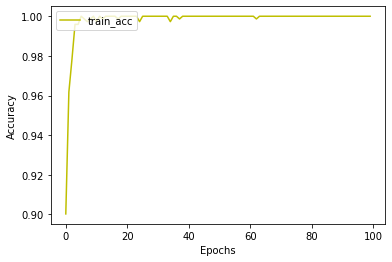

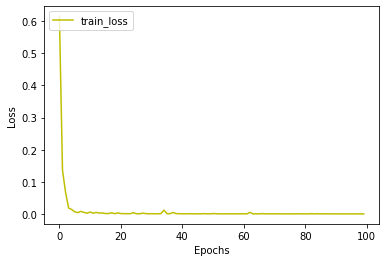

In [9]:
import matplotlib.pyplot as plt

# acc 그래프
plt.figure("train_graph")
plt.plot(history.history['acc'], 'y', label='train_acc')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# val 그래프
plt.figure("val_graph")
plt.plot(history.history['loss'], 'y', label='train_loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

In [2]:
import numpy as np
from PIL import Image
import glob

test_path = "D:/OCT-Image/OCT2017/small set/test_mini/"
categories = ['CNV', 'DME', 'DRUSEN', 'NORMAL']

image_w = 299
image_h = 299
result_list = []

for idx, categorie in enumerate(categories):
    files = glob.glob(test_path + categorie + "/*")
    
    for idx2, file in enumerate(files):
        img = Image.open(file)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)
        data = data.reshape((1,image_w,image_h,3))
        result = model.predict_classes(data)
        
        if categorie == 'CNV'and result[0] == 0:
            result_list.append(1)
        elif categorie == 'DME' and result[0] == 1:
            result_list.append(1)
        elif categorie == 'DRUSEN' and result[0] == 2:
            result_list.append(1)
        elif categorie == 'NORMAL' and result[0] == 3:
            result_list.append(1)
        else:
            result_list.append(0)
    
    print(result_list)
    print(categorie + "의 test정확도 : " + str(np.mean(result_list)))

NameError: name 'model' is not defined